In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 1.Array的简单运用

In [93]:
y=np.array([[1,2],[3,4],[5 ,6]])

print(y)

y[0]

y[0,1]

for i in y:
    print(i)

x=y.flatten() #flatten()可以把一个二维数组变成一维的
print(x)

[[1 2]
 [3 4]
 [5 6]]
[1 2]
[3 4]
[5 6]
[1 2 3 4 5 6]


# 2.plot的相关应用
## 2.1 plt.plot()基本使用

* 当给 **plt.plot()** 传入参数时，如果只传入绘制的数据列表时，默认数据作为Y轴值，而X轴的坐标则是由数据的下标组成的，共`N`个点对应X轴的`N`个坐标。<br/>
* **plt.plot()** 肯定也支持自定义X轴坐标，只需要调用的时候传入两个大小相同的数组即可，X坐标在前，Y坐标在后。举例如下：<br/>
```
x=np.arange(0 ,6 ,0.1)
y=np.sin(x)
plt.plot(x,y)
plt.show()
```
* **plt.plot()** 默认是将每个点通过直线连接起来，所以当点比较少的时候就呈现直线，当点较多时就呈现曲线。<br/>
## 2.2 plt.plot()标签等使用
* **plt.plot(xx, xx, linestyle = "--", label="name")** 
```
linestyle可以更改绘制的曲线，目前已知的有实线，虚线--，点划线-.
label作用是在绘制出的图像左下角加上函数图像的标签，标签名为`name`
```
* **plt.xlabel("abc")** 可给X轴加标签abc，同理ylabel可以给Y轴加
* **plt.title("abc")** 可给图像加标题abc

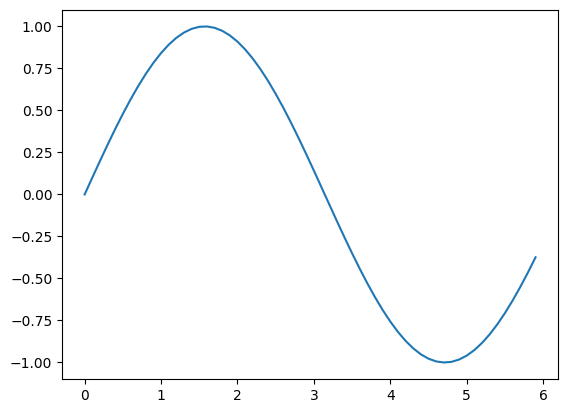

In [94]:
#生成数据
x=np.arange(0 ,6 ,0.1) # 以0.1为单位，生成0到6的数据
y=np.sin(x)
#绘制图像
plt.plot(x,y)
plt.show()

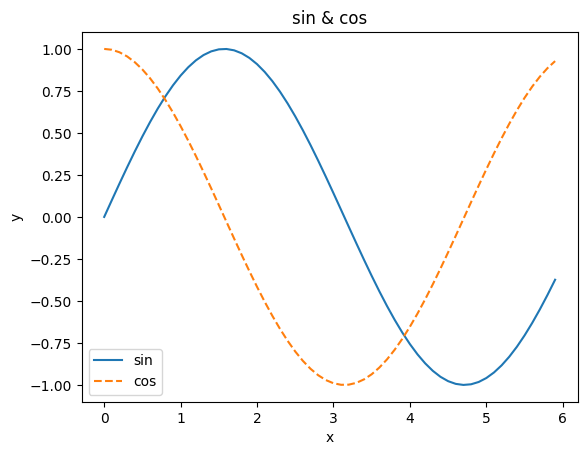

In [95]:
#生成数据
x=np.arange(0 ,6 ,0.1) # 以0.1为单位，生成0到6的数据
y1=np.sin(x)
y2=np.cos(x)
#绘制图像
plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle = "--", label="cos")# 用虚线绘制
plt.xlabel("x") # x轴标签
plt.ylabel("y") # y轴标签
plt.title("sin & cos") # 标题
plt.legend() #不知道这是干嘛用的
plt.show()

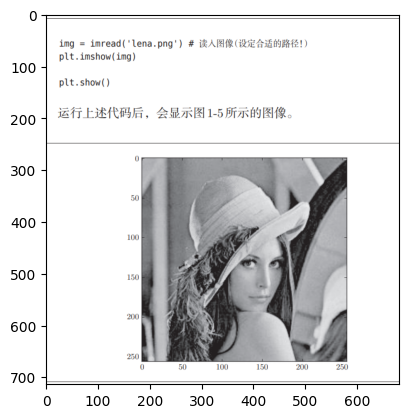

In [97]:
img = imread('lena.png')#lena.png是我放在文件夹MyScript下的一个图片
plt.imshow(img)
plt.show()

# 3.感知机的简单实现

In [103]:
def AND(x1 , x2): #定义一个接受参数x1和参数x2的函数
    w1, w2, theta = 0.5, 0.5, 0.7 #这三项分别是权重1，权重2，阈值
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


In [110]:
#阈值改为偏置后ANDgate的实现,大于0输出1，否则输出0
def AND(x1, x2):
 x = np.array([x1, x2])
 w = np.array([0.5, 0.5])
 b = -0.7
 tmp = np.sum(w*x) + b #w*x是一个array，sum()可以将这个数组中的所有项求和
 if tmp <= 0:
     return 0
 else:
     return 1

def NAND(x1, x2):
 x = np.array([x1, x2])
 w = np.array([-0.5, -0.5]) # 仅权重和偏置与AND不同！
 b = 0.7
 tmp = np.sum(w*x) + b
 if tmp <= 0:
     return 0
 else:
     return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 仅权重和偏置与AND不同！
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
         return 0
    else:
         return 1

## 3.1多层感知机-->异或门的实现

In [111]:
def XOR(x1, x2):
    s1=NAND(x1 ,x2)
    s2=OR(x1, x2)
    y=AND(s1, s2)
    return y
print(XOR(0 ,0))
print(XOR(1 ,0))
print(XOR(0 ,1))
print(XOR(1 ,1))

0
1
1
0


# 4.神经网络
## 4.1 阶跃函数的实现

* 一种激活函数以阈值为界，一旦输入超过阈值，就切换输出。这样的函数称为“阶跃函数”。

In [9]:
def step_fuction(x):
    y = x > 0 #对NumPy数组进行不等号运算后，数组的各个元素都会进行不等号运算，生成一个布尔型数组。
    return y.astype(np.int) #数组y是一个布尔型数组，但是我们想要的阶跃函数是会输出int型的0或1的函数。因此，需要把数组y的元素类型从布尔型转换为int型。

#这么写的好处在于x既能是int,float,也能是np.array

## 用图形看的话很直观

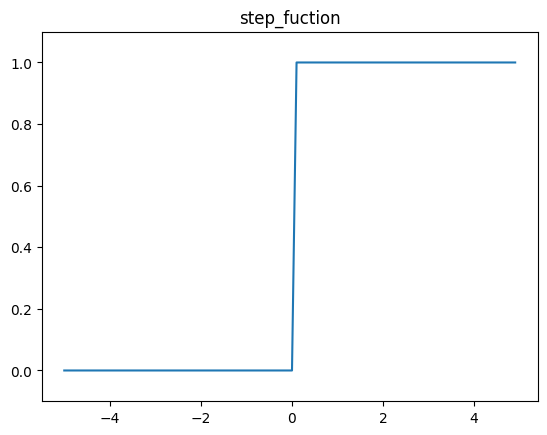

In [24]:
def step_fuction(x):
    return np.array(x>0 ,dtype = np.int32)

x = np.arange(-5.0 , 5.0 , 0.1)
y=step_fuction(x)
plt.plot(x,y)
plt.ylim( -0.1, 1.1) #指定y轴范围
plt.title("step_fuction")
plt.show()

## 4.2 sigmoid函数的实现

In [18]:
def sigmoid(x):
    return 1/(1+ np.exp(-x)) #exp是指e的-x次方。加上np是适用于数组

In [19]:
x=np.array([-0.5, -3, 1.7, 6])
sigmoid(x)

array([0.37754067, 0.04742587, 0.84553473, 0.99752738])

* 这里的简单sigmoid函数之所以能支持NumPy数组，秘密就在于NumPy的广播功能。
* 根据NumPy 的广播功能，如果在标量和NumPy数组之间进行运算，则标量会和NumPy数组的各个元素进行运算。
* 之前阶跃函数不可以的原因是它需要进行bool运算，广播功能不适用。
## 用图形直观的显示

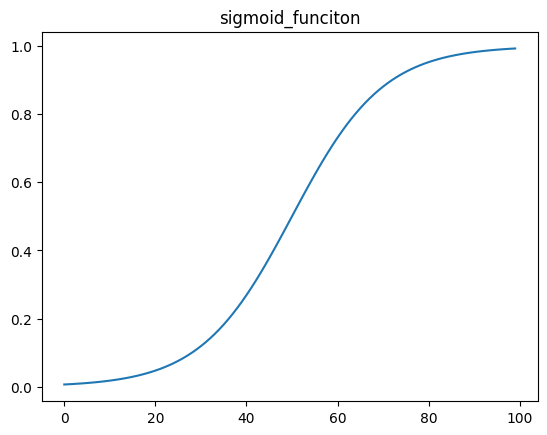

In [23]:
x=np.arange(-5.0 ,5.0 ,0.1)
y=sigmoid(x)
plt.title("sigmoid_funciton")
plt.plot(y)
plt.show()

## 阶跃函数和sigmoid函数的区分
* 相对于阶跃函数只能返回0或1，**sigmoid**函数可以返回0.731 ...、0.880 ...等实数（这一点和刚才的平滑性有关）。也就是说，感知机中神经元之间流动的是0或1的二元信号，而神经网络中流动的是连续的实数值信号。
* 接着说一下阶跃函数和**sigmoid**函数的共同性质。阶跃函数和**sigmoid**函数虽然在平滑性上有差异，但是如果从宏观视角看,可以发现它们具有相似的形状。也就是说，当输入信号为重要信息时，阶跃函数和**sigmoid**函数都会输出较大的值；当输入信号为不重要的信息时，两者都输出较小的值。
* 还有一个共同点是，不管输入信号有多小，或者有多大，输出信号的值都在0到1之间。

## 4.3 ReLU函数

In [26]:
def relu(x):
    return np.maximum(0,x)

## 4.4 矩阵的乘法&神经网络的内积

In [60]:
A = np.array([[1,2],[3,4]])

np.ndim(A)

B = np.array([[5,6],[7,8]])

np.ndim(B)

print(A*B) #直接乘积会运用广播

print(np.dot(A,B)) #dot是点积

[[ 5 12]
 [21 32]]
[[19 22]
 [43 50]]


## 4.5 三层神经网络的实现
![3层神经网络](img3_15.png "3层神经网络：输入层（第0层）有2个神经元，第1个隐藏层（第1层）有3个经元，第2个隐藏层（第2层）有2个神经元，输出层（第3层）有2个神经元")

图3-15 3层神经网络：输入层（第0层）有2个神经元，第1个隐藏层（第1层）有3个经元，第2个隐藏层（第2层）有2个神经元，输出层（第3层）有2个神经元

In [62]:
#这一段模拟三层神经网络的实现
#首先是第0层到第1层
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape) # (2,)
print(B1.shape) # (3,)
A1 = np.dot(X, W1) + B1

#接下来是第一层内部激活函数的处理
Z1 = sigmoid(A1)
print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


![输入层到第一层](img3_18.png "从输入层到第1层的信号传递")

接下来实现第1层到第2层的信号传递。

In [64]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2 # 第二层的神经元
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


最后是第2层到输出层的信号传递。

In [65]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

#最后是第2层到输出层的信号传递。输出层的实现也和之前的实现基本相同。
#不过，最后的激活函数和之前的隐藏层有所不同。
def identity_function(x):
    return x

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

* 这里我们定义了**identity_function()** 函数（也称为“恒等函数”），并将其作为输出层的激活函数。
* 恒等函数会将输入按原样输出，因此，这个例子中没有必要特意定义**identity_function()** 。这里这样实现只是为了和之前的流程保持统一。
## 下面是总共的代码整理

In [70]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network
#init_network()函数会进行权重和偏置的初始化，并将它们保存在字典变量network中。
#这个字典变量network中保存了每一层所需的参数（权重和偏置）。

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y
#这里出现了forward（前向）一词，它表示的是从输入到输出方向的传递处理。
#后面在进行神经网络的训练时，我们将介绍后向（backward，从输出到输入方向）的处理。

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

{'W1': array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]),
 'b1': array([0.1, 0.2, 0.3]),
 'W2': array([[0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]]),
 'b2': array([0.1, 0.2]),
 'W3': array([[0.1, 0.3],
        [0.2, 0.4]]),
 'b3': array([0.1, 0.2])}

### softmax函数:
```
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) #溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
```
* 但请注意，softmax函数可能存在栈溢出的问题

In [76]:
a = np.array([1010, 1000, 990])
c = np.max(a)
a - c
np.exp(a - c) / np.sum(np.exp(a - c))
#这种情况可以在不影响结果的情况下防止数据溢出

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])